<a href="https://colab.research.google.com/github/karthikpavan-vk/Stock-Market-Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Stock Market Prediction using LSTM (AAPL Example)

# Step 1: Install the necessary libraries
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow

# Step 2: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 3: Download AAPL stock data
df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
data = df[['Close']]
print(data.head())

/tmp/ipython-input-1405746081.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price          Close
Ticker          AAPL
Date                
2010-01-04  6.424606
2010-01-05  6.435714
2010-01-06  6.333344
2010-01-07  6.321636
2010-01-08  6.363664


In [2]:
# Step 4: Preprocess and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into train and test sets (80% for training)
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

In [3]:
# Create a dataset with 60 time steps
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)


In [5]:
# Reshape the input to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 5: Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0062
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 9.6359e-05
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 9.1816e-05
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 8.3501e-05
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 1.0852e-04
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 8.5335e-05
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 8.3307e-05
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 7.1258e-05
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 8.7707e-05
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 6.3837e-05


In [6]:
# Step 6: Make predictions and visualize the results
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


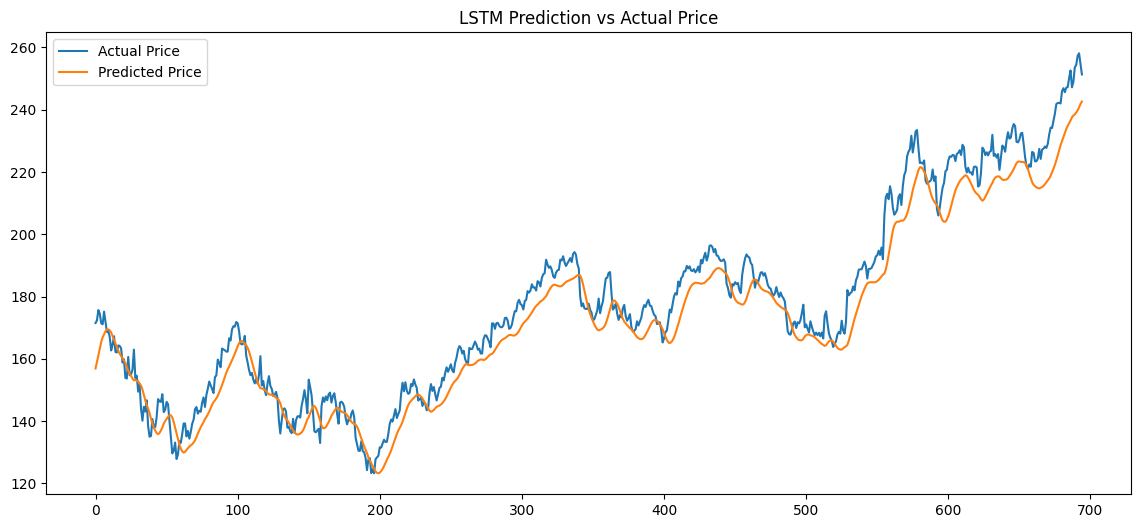

In [7]:

# Plotting the results
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title('LSTM Prediction vs Actual Price')
plt.show()

In [10]:
#  Stock Market Prediction using ARIMA (AAPL Example)

# Step 1: Install the necessary libraries
#!pip install yfinance numpy pandas matplotlib statsmodels

# Step 2: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [11]:
# Step 3: Download AAPL stock data
df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
data = df[['Close']]
print(data.head())

/tmp/ipython-input-498629538.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price          Close
Ticker          AAPL
Date                
2010-01-04  6.424606
2010-01-05  6.435714
2010-01-06  6.333344
2010-01-07  6.321636
2010-01-08  6.363664


In [12]:

# Step 4: Check for stationarity
result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 1.7639915969787103
p-value: 0.9982748614913421


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

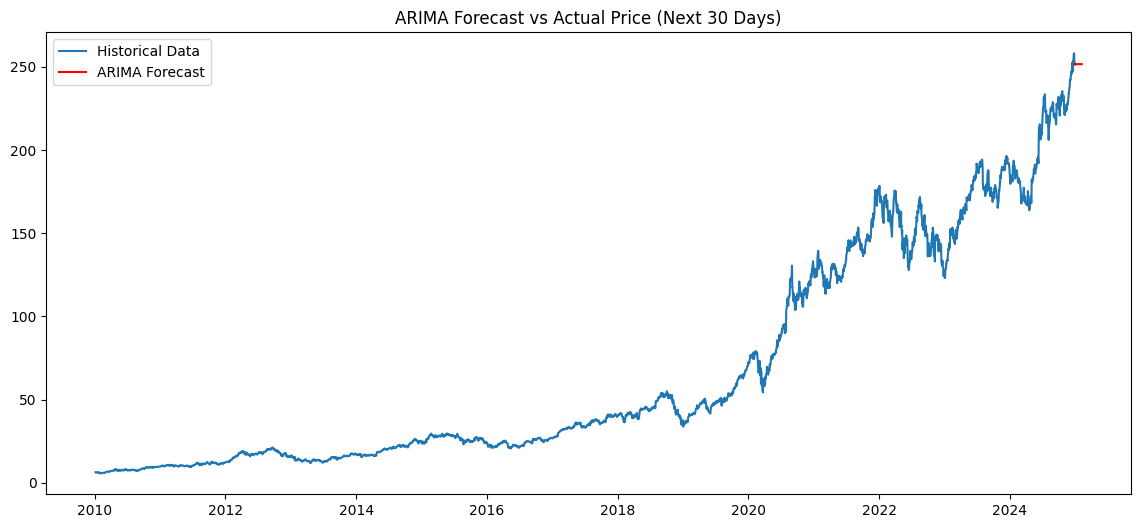

In [13]:
# If the p-value is greater than 0.05, the series is non-stationary and we may need to difference the data.
# For this example, let's assume the series is stationary (p-value < 0.05).

# Step 5: Fit ARIMA model (order can be tuned as needed)
# For now, let's use (5,1,0) as the ARIMA parameters
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

# Step 6: Make predictions
forecast = model_fit.forecast(steps=30)  # Predict next 30 days

# Step 7: Visualize the results
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual Price (Next 30 Days)')
plt.show()